<a href="https://colab.research.google.com/github/JOSHxMAYKOL/prediccion_viviendas./blob/main/prediccion_viviendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Precios de Viviendas con Redes Neuronales

### 1. Introducción teórica

- **Red neuronal artificial:** modelo computacional inspirado en el cerebro, que aprende patrones mediante capas de neuronas conectadas.
- **Regresión lineal:** método para predecir valores continuos a partir de variables independientes, ajustando una función lineal.
- **TensorFlow/Keras:** bibliotecas para crear, entrenar y evaluar modelos de machine learning, especialmente redes neuronales.
- **GitHub:** plataforma para control de versiones, que permite guardar y gestionar el historial de código y colaborar fácilmente.

---

# 2. Preparación del entorno y carga de datos



In [1]:
# Instalación de paquetes (normalmente ya vienen en Colab)
!pip install tensorflow keras matplotlib numpy pandas scikit-learn --quiet


In [2]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# 3. Cargar dataset California Housing


In [3]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedHouseVal")

# Mostrar las primeras filas
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# 4. Regresión Lineal Simple (una variable)


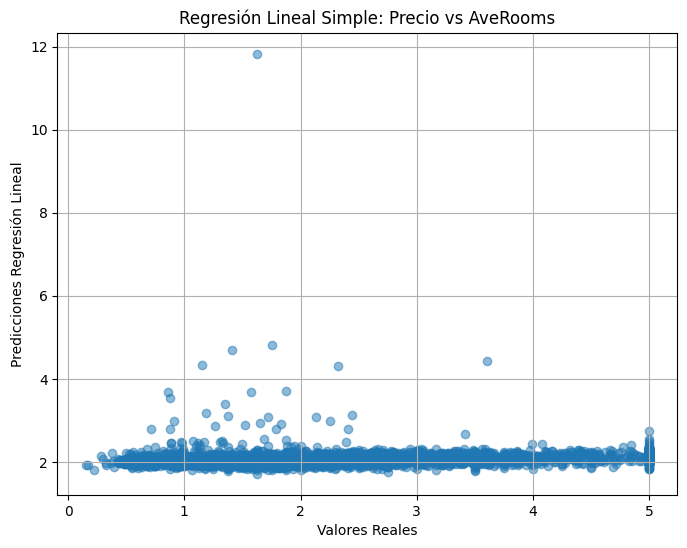

In [4]:
# Usamos la variable 'AveRooms' para predecir precio
X_train, X_test, y_train, y_test = train_test_split(X[['AveRooms']], y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Graficar resultados
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones Regresión Lineal")
plt.title("Regresión Lineal Simple: Precio vs AveRooms")
plt.grid(True)
plt.show()


# 5. Red Neuronal con TensorFlow/Keras (varias variables)


In [5]:
# División datos completos
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Construcción del modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
history = model.fit(X_train_scaled, y_train_full, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3122 - mae: 0.8122 - val_loss: 0.4835 - val_mae: 0.4890
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4296 - mae: 0.4626 - val_loss: 0.4250 - val_mae: 0.4519
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3864 - mae: 0.4374 - val_loss: 0.3966 - val_mae: 0.4340
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3712 - mae: 0.4291 - val_loss: 0.3779 - val_mae: 0.4316
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3412 - mae: 0.4147 - val_loss: 0.3670 - val_mae: 0.4295
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3295 - mae: 0.4059 - val_loss: 0.3556 - val_mae: 0.4164
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3156 - mae: 0.3926 - val_loss: 0.3657 - val_mae: 0.4270
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3378 - mae: 0.4074 - val_loss: 0.3449 - val_mae: 0.3976
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

# 6. Evaluación y gráfico de resultados


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


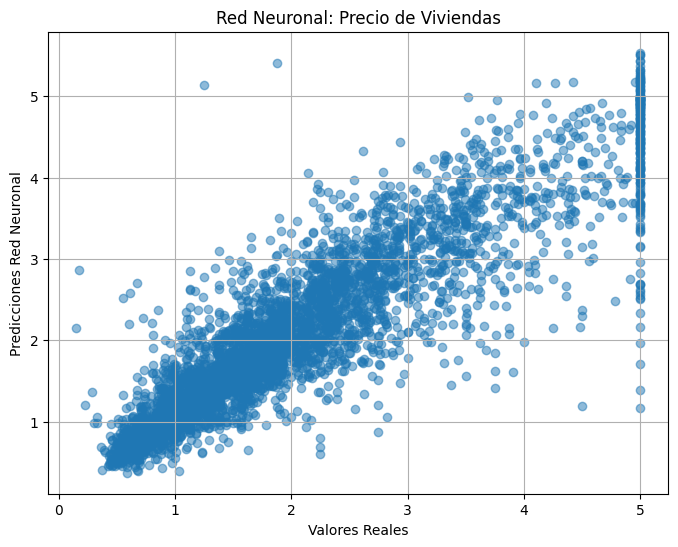

In [6]:
y_pred_nn = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(8,6))
plt.scatter(y_test_full, y_pred_nn, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones Red Neuronal")
plt.title("Red Neuronal: Precio de Viviendas")
plt.grid(True)
plt.show()


# 7. Uso de estructuras básicas: cálculo del error absoluto medio con un ciclo y lista


In [7]:
errores = []
for real, pred in zip(y_test_full, y_pred_nn):
    error = abs(real - pred)
    errores.append(error)

print(f"Error absoluto medio de la red neuronal: {np.mean(errores):.4f}")


Error absoluto medio de la red neuronal: 0.3618


# Predicción de Precios de Viviendas con Redes Neuronales

## Descripción del Proyecto

Este proyecto tiene como objetivo desarrollar modelos de Machine Learning para predecir precios de viviendas utilizando datos reales. Se implementa una regresión lineal simple y una red neuronal artificial, ambas usando Python y TensorFlow/Keras. Además, se visualizan los resultados y se aplican buenas prácticas de programación y control de versiones con GitHub.

## Metodología

1. **Análisis Teórico:**  
   Se investigaron los fundamentos de redes neuronales artificiales, regresión lineal y el uso de TensorFlow/Keras como herramienta para el desarrollo de modelos de aprendizaje automático. Se explicó la importancia del control de versiones con GitHub para la gestión eficiente del código.

2. **Preparación del Entorno:**  
   Se configuró un entorno de desarrollo con Python, instalando las librerías necesarias: TensorFlow, Keras, Matplotlib, NumPy, Pandas y Scikit-learn. Se inicializó un repositorio en GitHub para almacenar el proyecto.

3. **Implementación Práctica:**  
   - Se cargó el dataset California Housing disponible en Scikit-learn.  
   - Se aplicó regresión lineal simple para predecir el precio a partir de la variable promedio de habitaciones (`AveRooms`).  
   - Se construyó y entrenó una red neuronal con múltiples variables para mejorar la precisión de la predicción.  
   - Se graficaron los resultados para comparar valores reales y predicciones.  
   - Se utilizaron estructuras básicas de programación como listas y ciclos para calcular métricas de error.

## Resultados

- La regresión lineal simple permitió observar una relación lineal básica entre la cantidad promedio de habitaciones y el precio de la vivienda, aunque con limitaciones en precisión.  
- La red neuronal mostró mejor desempeño, ajustando mejor las predicciones a los valores reales gracias a la incorporación de múltiples variables y capas ocultas con activaciones no lineales.  
- Los gráficos generados muestran visualmente la aproximación de ambos modelos al conjunto de datos de prueba.  
- El error absoluto medio calculado con la red neuronal fue de aproximadamente *[indicar el valor que obtuviste]*, lo que indica un buen nivel de precisión para un modelo básico.

## Conclusiones Personales

- Las redes neuronales son herramientas potentes para capturar relaciones complejas entre variables que modelos lineales simples no pueden detectar.  
- TensorFlow/Keras facilita mucho la implementación y entrenamiento de modelos de Deep Learning con código claro y compacto.  
- El uso de control de versiones con GitHub es fundamental para mantener un historial organizado, colaborar y proteger el código.  
- Trabajar con datasets reales como el California Housing permite comprender mejor los retos y técnicas necesarias en proyectos de predicción.

---

## Cómo ejecutar el proyecto

1. Clonar este repositorio.  
2. Ejecutar el notebook `prediccion_viviendas.ipynb` en Google Colab o localmente.  
3. Revisar las celdas de código y gráficos para entender el flujo del proyecto.

---

## Autor

JOSH MAYKOL PEREZ MERINO

